In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import pickle

In [2]:
user_health = preprocessing.load_users_health()
food_pref = preprocessing.load_food_pref_dataset()

In [3]:
user_health.head()

,seqn,weight,height,bmi,upper_leg_length,upper_arm_length,arm_circumference,waist_circumference,hip_circumference,systolic,diastolic,pulse
0,109264.0,42.2,154.7,17.6,36.3,33.8,22.7,63.8,85.000000,108.000000,67.000000,93.333333
1,109266.0,97.1,160.2,37.8,40.8,34.7,35.8,117.9,126.100000,99.000000,54.333333,66.666667
2,109270.0,75.3,156.0,30.9,42.6,36.1,31.0,91.4,105.696877,124.666667,73.333333,95.333333
3,109271.0,98.8,182.3,29.7,40.1,42.0,38.2,120.4,108.200000,107.000000,67.000000,71.333333
4,109273.0,74.3,184.2,21.9,41.0,41.1,30.2,86.8,94.500000,113.666667,67.333333,70.333333


In [4]:
food_pref.head()

,seqn,intake_day_of_week,name_of_eating_occasion,source_of_food,location_of_food_home,usda_food_code,grams,energy_kcal,protein_gm,carbohydrate_gm,...,pfa_eicosadienoic_gm,pfa_eicosatrienoic_gm,pfa_docosapentaenoic_gm,pfa_docosahexaenoic_gm,Food code,Main food description,WWEIA Category number,WWEIA Category description,Start date,End date
0,109263,Friday,Dinner,Store - grocery/supermarket,Yes,28320300,199.50,114.0,12.11,5.07,...,0.012,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
1,112171,Saturday,Dinner,Grown or caught by you or someone you know,Yes,28320300,299.25,172.0,18.08,8.32,...,0.018,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
2,112586,Saturday,Lunch,From someone else/gift,Yes,28320300,199.51,114.0,12.11,5.07,...,0.012,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
3,112670,Sunday,Dinner,Store - grocery/supermarket,Yes,28320300,128.25,74.0,7.75,3.56,...,0.008,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
4,112670,Sunday,Breakfast,Store - grocery/supermarket,Yes,28320300,171.00,98.0,10.33,4.75,...,0.010,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31


In [5]:
def convert_to_rating(series):                
    count = series.value_counts()

    series = series.apply(lambda x: count[x])

    max_ = count.max()
    min_ = count.min()                 
        
    return (series + 1 - min_) / (max_ - min_ + 1)


In [6]:
df = pd.DataFrame(food_pref)
df['rating'] = food_pref.groupby('seqn')['usda_food_code'].transform(convert_to_rating)
rating_df = df[['seqn', 'usda_food_code', 'rating']]
rating_df.head()

,seqn,usda_food_code,rating
0,109263,28320300,0.5
1,112171,28320300,1.0
2,112586,28320300,1.0
3,112670,28320300,1.0
4,112670,28320300,1.0


In [7]:
food_feature_columns = ["grams",
        "energy_kcal",
        "protein_gm",
        "carbohydrate_gm",
        "total_sugar_gm",
        "dietary_fiber_gm",
        "total_fat_gm",
        "total_saturated_fatty_acids_gm",
        "total_monounsaturated_fatty_acids_gm",
        "total_polyunsaturated_fatty_acids_gm",
        "cholesterol_mg",
        "vitamin_e_mg",
        "added_alpha_tocopherol_mg",
        "retinol_mcg",
        "vitamin_a_rae_mcg",
        "alpha_carotene_mcg",
        "beta_carotene_mcg",
        "beta_cryptoxanthin_mcg",
        "lycopene_mcg",
        "lutein_zeaxanthin_mcg",
        "thiamin_mg",
        "riboflavin_mg",
        "niacin_mg",
        "vitamin_b6_mg",
        "total_folate_mcg",
        "folic_acid_mcg",
        "food_folate_mcg",
        "dietary_folate_equivalents_mcg",
        "total_choline_mg",
        "vitamin_b12_mcg",
        "added_vitamin_b12_mcg",
        "vitamin_c_mg",
        "vitamin_d_d2_d3_mcg",
        "vitamin_k_mcg",
        "calcium_mg",
        "phosphorus_mg",
        "magnesium_mg",
        "iron_mg",
        "zinc_mg",
        "copper_mg",
        "sodium_mcg",
        "potassium_mg",
        "selenium_mcg",
        "caffeine_mg",
        "theobromine_mg",
        "alcohol_gm",
        "moisture_gm",
        "sfa_butanoic_gm",
        "sfa_hexanoic_gm",
        "sfa_octanoic_gm",
        "sfa_decanoic_gm",
        "sfa_dodecanoic_gm",
        "sfa_tetradecanoic_gm",
        "sfa_hexadecanoic_gm",
        "sfa_octadecanoic_gm",
        "mfa_hexadecenoic_gm",
        "mfa_octadecenoic_gm",
        "mfa_eicosenoic_gm",
        "mfa_docosenoic_gm",
        "pfa_octadecadienoic_gm",
        "pfa_octadecatrienoic_gm",
        "pfa_octadecatetraenoic_gm",
        "pfa_eicosadienoic_gm",
        "pfa_eicosatrienoic_gm",
        "pfa_docosapentaenoic_gm",
        "pfa_docosahexaenoic_gm",]

In [8]:
df_food_rating = pd.DataFrame()
df_food_rating['seqn'] = rating_df['seqn']
df_food_rating['usda_food_code'] = rating_df['usda_food_code']
df_food_rating['rating'] = rating_df['rating'].astype(float)
df_food_rating[food_feature_columns] = food_pref[food_feature_columns]

In [9]:
day_le = LabelEncoder()
day = day_le.fit_transform(food_pref['intake_day_of_week'].values)

occation_le = LabelEncoder()
occation = occation_le.fit_transform(food_pref['name_of_eating_occasion'].values.reshape(-1, 1))       

source_le = OneHotEncoder(sparse=False)
source = source_le.fit_transform(food_pref['source_of_food'].values.reshape(-1, 1)) 

scaler = StandardScaler()

df = df_food_rating[["seqn", "usda_food_code", "rating"] + food_feature_columns]
df[food_feature_columns] = scaler.fit_transform(df_food_rating[food_feature_columns])    

c:\Users\L\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\L\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
with open('day_encoder.pickle', 'wb') as f:
    pickle.dump(day_le, f)

with open('occation_encoder.pickle', 'wb') as f:
    pickle.dump(occation_le, f)

with open('source_encoder.pickle', 'wb') as f:
    pickle.dump(source_le, f)

with open('scaler.pickle', 'wb') as f:
    pickle.dump(scaler, f)
    

In [11]:
df.head()

,seqn,usda_food_code,rating,grams,energy_kcal,protein_gm,carbohydrate_gm,total_sugar_gm,dietary_fiber_gm,total_fat_gm,...,mfa_octadecenoic_gm,mfa_eicosenoic_gm,mfa_docosenoic_gm,pfa_octadecadienoic_gm,pfa_octadecatrienoic_gm,pfa_octadecatetraenoic_gm,pfa_eicosadienoic_gm,pfa_eicosatrienoic_gm,pfa_docosapentaenoic_gm,pfa_docosahexaenoic_gm
0,109263,28320300,0.5,0.085152,-0.143642,0.734353,-0.498431,-0.363180,0.266717,-0.072528,...,0.038240,0.215254,-0.080236,-0.135023,-0.103540,-0.07538,0.094681,-0.065156,-0.125102,-0.077358
1,112171,28320300,1.0,0.410993,0.165342,1.349121,-0.363248,-0.280396,0.707407,0.173553,...,0.329943,0.397034,0.035354,0.025099,0.078515,-0.07538,0.301119,-0.065156,-0.125102,-0.077358
2,112586,28320300,1.0,0.085185,-0.143642,0.734353,-0.498431,-0.363180,0.266717,-0.072528,...,0.038240,0.215254,-0.080236,-0.135023,-0.103540,-0.07538,0.094681,-0.065156,-0.125102,-0.077358
3,112670,28320300,1.0,-0.147592,-0.356734,0.285376,-0.561238,-0.408215,0.021889,-0.248869,...,-0.154416,-0.011972,-0.041706,-0.248095,-0.188066,-0.07538,-0.042945,-0.065156,-0.125102,-0.077358
4,112670,28320300,1.0,-0.007945,-0.228879,0.551055,-0.511741,-0.376426,0.168786,-0.143264,...,-0.033326,0.078918,-0.003176,-0.179796,-0.123046,-0.07538,0.025868,-0.065156,-0.125102,-0.077358


In [12]:
user_idx_map = {u: e for e, u in enumerate(df.seqn.unique())}
food_idx_map = {i: e for e, i in enumerate(df.usda_food_code.unique())}

In [13]:
with open('user_idx_map.pickle', 'wb') as f:
    pickle.dump(user_idx_map, f)

with open('food_idx_map.pickle', 'wb') as f:
    pickle.dump(food_idx_map, f)

In [14]:
df["user_idx"] = df["seqn"].apply(lambda x: user_idx_map[x])
df["food_idx"] = df["usda_food_code"].apply(lambda x: food_idx_map[x])

In [15]:
print(df["user_idx"].max())
print(df["food_idx"].max())

12557
4511


In [16]:
df.head()

,seqn,usda_food_code,rating,grams,energy_kcal,protein_gm,carbohydrate_gm,total_sugar_gm,dietary_fiber_gm,total_fat_gm,...,mfa_docosenoic_gm,pfa_octadecadienoic_gm,pfa_octadecatrienoic_gm,pfa_octadecatetraenoic_gm,pfa_eicosadienoic_gm,pfa_eicosatrienoic_gm,pfa_docosapentaenoic_gm,pfa_docosahexaenoic_gm,user_idx,food_idx
0,109263,28320300,0.5,0.085152,-0.143642,0.734353,-0.498431,-0.363180,0.266717,-0.072528,...,-0.080236,-0.135023,-0.103540,-0.07538,0.094681,-0.065156,-0.125102,-0.077358,0,0
1,112171,28320300,1.0,0.410993,0.165342,1.349121,-0.363248,-0.280396,0.707407,0.173553,...,0.035354,0.025099,0.078515,-0.07538,0.301119,-0.065156,-0.125102,-0.077358,1,0
2,112586,28320300,1.0,0.085185,-0.143642,0.734353,-0.498431,-0.363180,0.266717,-0.072528,...,-0.080236,-0.135023,-0.103540,-0.07538,0.094681,-0.065156,-0.125102,-0.077358,2,0
3,112670,28320300,1.0,-0.147592,-0.356734,0.285376,-0.561238,-0.408215,0.021889,-0.248869,...,-0.041706,-0.248095,-0.188066,-0.07538,-0.042945,-0.065156,-0.125102,-0.077358,3,0
4,112670,28320300,1.0,-0.007945,-0.228879,0.551055,-0.511741,-0.376426,0.168786,-0.143264,...,-0.003176,-0.179796,-0.123046,-0.07538,0.025868,-0.065156,-0.125102,-0.077358,3,0


In [17]:
from sklearn.model_selection import train_test_split

df_rating_train, df_rating_test = train_test_split(df, test_size=0.1, random_state=42)

In [18]:
X_train = [df_rating_train['user_idx'].values, df_rating_train['food_idx'].values, df_rating_train.drop(['seqn', 'usda_food_code', 'rating', 'user_idx', 'food_idx'], axis=1)]
y_train = df_rating_train['rating'].values

X_test = [df_rating_test['user_idx'].values, df_rating_test['food_idx'].values, df_rating_test.drop(['seqn', 'usda_food_code', 'rating', 'user_idx', 'food_idx'], axis=1)]
y_test = df_rating_test['rating'].values

In [19]:
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()
tf.compat.v1.enable_eager_execution()
import tensorflow.keras as keras
from tensorflow.keras.layers import Input, Embedding, Dot, Concatenate, Add, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

Instructions for updating:
non-resource variables are not supported in the long term


In [20]:
def create_model(n_users, user_embed_size_dot, user_embed_size_concat, n_items, item_embed_size, item_feature_len, regularization=1e-4):
     
    item_features = Input(shape=(item_feature_len, ), name="item_features")
    user_inp = Input(shape=(1, ), dtype='int32', name="user_embed")
    user_embed = Embedding(n_users, 
                           user_embed_size_dot, 
                           name='user_embed_mat',
                           embeddings_initializer="glorot_uniform", 
                           embeddings_regularizer=keras.regularizers.l2(regularization))(user_inp)
    user_embed_bias = Embedding(n_users, 
                                1, 
                                name='user_embed_bias_mat',
                                embeddings_initializer="glorot_uniform")(user_inp)
    user_embed_c = Embedding(n_users, 
                             user_embed_size_concat, 
                             name='user_embed_c_mat',
                             embeddings_initializer="glorot_uniform", 
                             embeddings_regularizer=keras.regularizers.l2(regularization))(user_inp)
    
    item_inp = Input(shape=(1, ), dtype='int32', name="item_embed")
    item_embed = Embedding(n_items, 
                           item_embed_size, 
                           name='item_embed_mat',
                           embeddings_initializer="glorot_uniform", 
                           embeddings_regularizer=keras.regularizers.l2(regularization))(item_inp)
    item_embed_bias = Embedding(n_items, 
                                1, 
                                name='item_embed_bias_mat',
                                embeddings_initializer="glorot_uniform")(item_inp)
    
    user_item_dot = Dot(axes=2, name='user_item_dot')([user_embed, item_embed])
    
    user_item_dot = Add()([user_item_dot, user_embed_bias, item_embed_bias])
    user_item_dot = Flatten()(user_item_dot)
    user_embed_c = Flatten()(user_embed_c)
    
    user_item_concat = Concatenate(axis=1)([user_embed_c, item_features])
    
    hidden1 = Dense(8, activation="relu")(user_item_concat)
    hidden1 = BatchNormalization()(hidden1)
    hidden1 = Dropout(0.2)(hidden1)
    
    dot_hidden1_concat = Concatenate(axis=1)([hidden1, user_item_dot])
    
    output = Dense(1, activation="relu")(dot_hidden1_concat)
    
    model = Model([user_inp, item_inp, item_features], output)
    
    return model
    

In [28]:
N_USERS = df.user_idx.max() + 1
N_ITEMS = df.food_idx.max() + 1
USER_EMBEDDING_SIZE_DOT = 20
USER_EMBEDDING_SIZE_CONCAT = 20
ITEM_EMBEDDING_SIZE = 20
ITEM_FEATURE_LEN = len(food_feature_columns)

model = create_model(N_USERS, USER_EMBEDDING_SIZE_DOT, USER_EMBEDDING_SIZE_CONCAT, N_ITEMS, ITEM_EMBEDDING_SIZE, ITEM_FEATURE_LEN)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_embed (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 user_embed_c_mat (Embedding)   (None, 1, 20)        251160      ['user_embed[0][0]']             
                                                                                                  
 flatten_3 (Flatten)            (None, 20)           0           ['user_embed_c_mat[0][0]']       
                                                                                                  
 item_features (InputLayer)     [(None, 66)]         0           []                               
                                                                                            

In [29]:
model.compile(Adam(1e-3), loss="mse", metrics=["mae"])

In [30]:
# callbacks defined

# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.5
    epochs_drop = 5
    lrate = initial_lrate * (drop**((1 + epoch)/epochs_drop))
    return lrate

lrate_scheduler = LearningRateScheduler(step_decay)
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model_chkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# model fitting
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.1, callbacks=[early_stop, model_chkpoint, lrate_scheduler])

Epoch 1/50
4193/4195 [============================>.] - ETA: 0s - loss: 0.1164 - mae: 0.2517
Epoch 1: val_loss improved from inf to 0.04687, saving model to best_model.h5
4195/4195 [==============================] - 52s 12ms/step - loss: 0.1164 - mae: 0.2516 - val_loss: 0.0469 - val_mae: 0.1597 - lr: 8.7055e-04
Epoch 2/50
4190/4195 [============================>.] - ETA: 0s - loss: 0.0373 - mae: 0.1382
Epoch 2: val_loss improved from 0.04687 to 0.03712, saving model to best_model.h5
4195/4195 [==============================] - 37s 9ms/step - loss: 0.0373 - mae: 0.1382 - val_loss: 0.0371 - val_mae: 0.1360 - lr: 7.5786e-04
Epoch 3/50
4190/4195 [============================>.] - ETA: 0s - loss: 0.0318 - mae: 0.1230
Epoch 3: val_loss improved from 0.03712 to 0.03517, saving model to best_model.h5
4195/4195 [==============================] - 36s 9ms/step - loss: 0.0318 - mae: 0.1230 - val_loss: 0.0352 - val_mae: 0.1281 - lr: 6.5975e-04
Epoch 4/50
4189/4195 [============================>.] -

In [31]:
model.predict(X_test)

518/518 [==============================] - 2s 4ms/step


array([[0.99684525],
       [0.5406385 ],
       [0.48996627],
       ...,
       [0.44338906],
       [0.5290402 ],
       [0.6981675 ]], dtype=float32)

In [32]:
df_rating_test['prediction'] = [t[0] for t in model.predict(X_test)]

518/518 [==============================] - 2s 3ms/step


In [33]:
df_rating_test[['rating', 'prediction']].head()

,rating,prediction
123563,1.000000,0.996845
13256,0.500000,0.540639
114342,0.500000,0.489966
152815,0.333333,0.374104
35,0.333333,0.376158


In [34]:
print("Test MAE: {}".format(sum(abs(df_rating_test["rating"] - df_rating_test["prediction"]))/len(df_rating_test)))

Test MAE: 0.11532597053637456


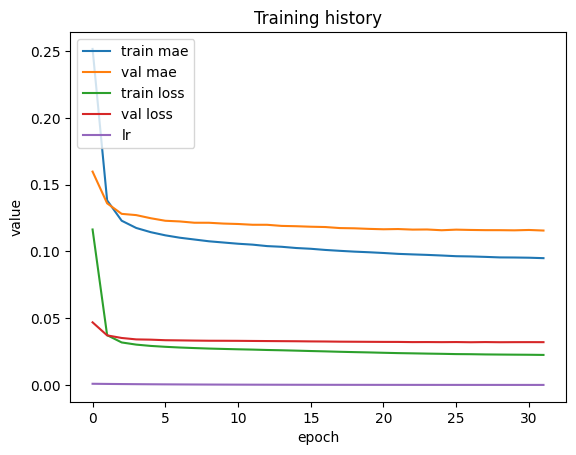

In [45]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['lr'])
plt.title('Training history')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['train mae', 'val mae', 'train loss', 'val loss', 'lr'], loc='upper left')
plt.show()